Here are 10 SQL problems — 5 for **converting from long to wide format**, and 5 for **converting from wide to long format** — covering common real-world scenarios.

---

### 🧱 **1–5: Long → Wide Format (Pivoting)**

#### **Problem 1: Sales per Quarter**
**Table:** `sales_long`

| salesperson | quarter | sales |
|-------------|---------|-------|
| Alice       | Q1      | 1000  |
| Alice       | Q2      | 1200  |
| Bob         | Q1      | 900   |
| Bob         | Q2      | 1100  |

**Task:** Pivot this to show one row per salesperson with columns `Q1_sales`, `Q2_sales`, etc.

---

#### **Problem 2: Employee Department Assignment**
**Table:** `employee_dept`

| emp_id | department | start_date |
|--------|------------|------------|
| 101    | HR         | 2021-01-01 |
| 101    | IT         | 2022-01-01 |
| 102    | Finance    | 2020-05-01 |

**Task:** Convert to wide format showing each employee's departments as columns: `dept1`, `dept2`, ...

```sql
select emp_id,
MAX(CASE WHEN rn = 1 then department else NULL end) as depart1,
MAX(CASE WHEN rn = 2 then department else NULL end) as depart2
from(select emp_id, department,
row_number() over(partition by emp_id) as rn
from employee_dept) as t1
group by emp_id;
```

---

#### **Problem 3: Survey Answers**
**Table:** `survey_answers`

| user_id | question | answer |
|---------|----------|--------|
| 1       | Q1       | Yes    |
| 1       | Q2       | No     |
| 2       | Q1       | No     |
| 2       | Q2       | Yes    |

**Task:** Pivot to show one row per user, with `Q1`, `Q2`, etc. as columns.

---

#### **Problem 4: Product Prices over Time**
**Table:** `product_prices`

| product_id | year | price |
|------------|------|-------|
| P001       | 2020 | 10.5  |
| P001       | 2021 | 12.0  |
| P002       | 2020 | 9.0   |
| P002       | 2021 | 9.5   |

**Task:** Pivot by `product_id` and display prices as `price_2020`, `price_2021`, etc.

---

#### **Problem 5: Student Grades**
**Table:** `student_grades`

| student_id | subject | grade |
|------------|---------|-------|
| 1          | Math    | A     |
| 1          | English | B     |
| 2          | Math    | B     |
| 2          | English | A     |

**Task:** Pivot the table so each student has a column for `Math`, `English`, etc.

---

### 🔁 **6–10: Wide → Long Format (Unpivoting)**

#### **Problem 6: Product Sales by Region**
**Table:** `sales_wide`

| product_id | north | south | east | west |
|------------|-------|-------|------|------|
| P001       | 100   | 150   | 120  | 130  |
| P002       | 200   | 250   | 180  | 170  |

**Task:** Convert to long format with columns: `product_id`, `region`, `sales`.

```sql

SELECT product_id, 'north' as region, north as sales
FROM sales_wide
UNION ALL
SELECT product_id, 'south' as region, south as sales
FROM sales_wide
UNION ALL
SELECT product_id, 'east' as region, east as sales
FROM sales_wide
UNION ALL
SELECT product_id, 'west' as region, west as sales
FROM sales_wide;
```

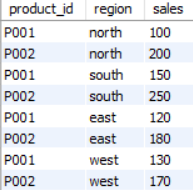

---

#### **Problem 7: Monthly Expenses**
**Table:** `expenses`

| user_id | jan | feb | mar |
|---------|-----|-----|-----|
| 1       | 100 | 120 | 110 |
| 2       | 90  | 100 | 105 |

**Task:** Unpivot to: `user_id`, `month`, `expense`.

---


#### **Problem 8: Grades for Each Semester**
**Table:** `grades_wide`

| student_id | sem1_math | sem1_eng | sem2_math | sem2_eng |
|------------|-----------|----------|-----------|----------|
| 1          | A         | B        | A         | A        |
| 2          | B         | A        | B         | B        |

**Task:** Unpivot so each row is: `student_id`, `semester`, `subject`, `grade`.

```sql
select student_id,
'sem1' as semester,
'math' as subject,
sem1_math as grade
from grades_wide
UNION ALL
select student_id,
'sem1' as semester,
'eng' as subject,
sem1_eng as grade
from grades_wide
UNION ALL
select student_id,
'sem2' as semester,
'math' as subject,
sem2_math as grade
from grades_wide
UNION ALL
select student_id,
'sem2' as semester,
'eng' as subject,
sem2_eng as grade
from grades_wide;
```

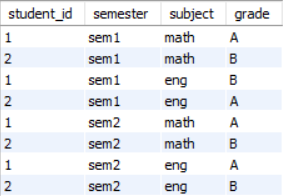

---

#### **Problem 9: Employee Attendance**
**Table:** `attendance_wide`

| emp_id | day1 | day2 | day3 |
|--------|------|------|------|
| E001   | P    | A    | P    |
| E002   | A    | P    | P    |

**Task:** Unpivot to: `emp_id`, `day`, `status`.

---

If you'd like the **SQL code** for any of these scenarios (standard SQL, PostgreSQL, MySQL, or SQL Server), just let me know which one!

# tough ones

Great! Here's a set of **challenging SQL questions** based on **long ↔ wide transformations**, perfect for **interviews and coding rounds**. These questions test not just transformation, but also **grouping**, **aggregation**, **conditional pivoting**, **window functions**, and **data normalization**.

---

## 🔁 **LONG ↔ WIDE Hard Interview-Level SQL Problems**

---

### **1. Multi-Level Pivot with Aggregation**
**Table:** `sales_data`

| region | year | product | revenue |
|--------|------|---------|---------|
| East   | 2023 | A       | 1000    |
| East   | 2023 | B       | 800     |
| East   | 2024 | A       | 1100    |
| West   | 2023 | A       | 900     |
| West   | 2023 | B       | 950     |

**Question:**  
Write a query to pivot this data into a format where each **region** is a row, and each **year-product** combo is a separate column with total revenue.  
Example: `2023_A`, `2023_B`, `2024_A`, etc.

```sql
select region,
sum(CASE WHEN year = '2023' and product = 'A' then revenue else null end) as '2023_A',
sum(CASE WHEN year = '2023' and product = 'B' then revenue else null end) as '2023_B',
sum(CASE WHEN year = '2024' and product = 'A' then revenue else null end) as '2024_A'
from sales_data
group by region;
```

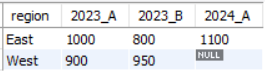

### **2. Normalize Wide → Long, Then Rank**
**Table:** `student_scores`

| student_id | math | physics | chemistry |
|------------|------|---------|-----------|
| 101        | 85   | 70      | 75        |
| 102        | 90   | 80      | 85        |

**Question:**  
Convert this to long format with: `student_id`, `subject`, `score`. Then rank the students **within each subject** by score.

```sql
select *,
DENSE_RANK() over(PARTITION BY subject order by marks desc) as `rank`
from 
  (select student_id,
  'math' as subject, 
  math as marks
  from student_scores
  UNION ALL
  select student_id,
  'physics' as subject, 
  physics as marks
  from student_scores
  UNION ALL
  select student_id,
  'chemistry' as subject, 
  chemistry as marks
  from student_scores)
as e1;
```

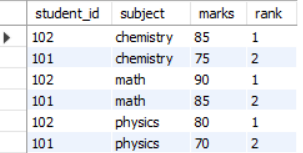

### **3. Conditional Unpivot + Filter**
**Table:** `expenses`

| emp_id | food_exp | travel_exp | rent_exp |
|--------|----------|------------|----------|
| E01    | 200      | 300        | 800      |
| E02    | 150      | 600        | 0        |

**Question:**  
Unpivot this table to get: `emp_id`, `expense_type`, `amount`. Then filter to only show rows where amount > 200.

```sql
select * from
 (select emp_id,
  'food_exp' as expense_type,
  food_exp as amount
  from expenses
  UNION ALL
  select emp_id,
  'travel_exp' as expense_type,
  travel_exp as amount
  from expenses
  UNION ALL
  select emp_id,
  'rent_exp' as expense_type,
  rent_exp as amount
  from expenses) e1
where amount > 200;
```

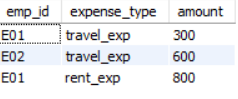

### **4. Semi-Pivot + Windowed Comparison**
**Table:** `daily_steps`

| user_id | day  | steps |
|---------|------|-------|
| 1       | 2024-01-01 | 1000 |
| 1       | 2024-01-02 | 1100 |
| 1       | 2024-01-03 | 1300 |
| 2       | 2024-01-01 | 800  |
| 2       | 2024-01-02 | 900  |

**Question:**  
Create a wide-format table with three columns: `user_id`, `first_day_steps`, `last_day_steps`, and compute the **percentage change in steps**.

### **5. Pivot Only the Latest N Entries**
**Table:** `price_history`

| item_id | date       | price |
|---------|------------|-------|
| A001    | 2024-01-01 | 10    |
| A001    | 2024-01-02 | 11    |
| A001    | 2024-01-03 | 12    |

**Question:**  
Pivot the **latest 2 prices** into columns `latest_price`, `previous_price` for each `item_id`.

```sql
select item_id, latest_price, previous_price from (select item_id,date,
max(date) over(partition by item_id) as max_date,
price as latest_price,
LAG(price) over(partition by item_id order by date) as previous_price
from price_history) as e1
where date = max_date;
```

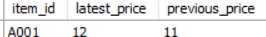

### **6. Multi-Row to Single Row with JSON Column**
**Table:** `customer_prefs`

| customer_id | category | preference |
|-------------|----------|------------|
| C001        | Food     | Pizza      |
| C001        | Music    | Rock       |
| C002        | Food     | Sushi      |

**Question:**  
Convert this to one row per customer with a **JSON column** showing key-value pairs of category and preference.

Expected output:
```
C001 | {"Food": "Pizza", "Music": "Rock"}
C002 | {"Food": "Sushi"}
```



### **7. Dynamic Pivot (if your SQL flavor supports it)**
**Table:** `poll_votes`

| user_id | option |
|---------|--------|
| 1       | A      |
| 2       | B      |
| 3       | A      |
| 1       | C      |

**Question:**  
Pivot the table so that each row is a `user_id`, and each column is an `option` (A, B, C), with values 1 if voted, 0 otherwise.

```sql
select user_id ,
sum(if(`option`='A',1,0)) as A,
sum(if(`option`='B',1,0)) as B,
sum(if(`option`='C',1,0)) as C
from poll_votes
group by user_id
```

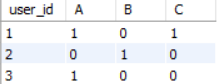



### **8. Wide → Long + Running Total**
**Table:** `quarterly_revenue`

| company | Q1  | Q2  | Q3  | Q4  |
|---------|-----|-----|-----|-----|
| C001    | 100 | 150 | 200 | 250 |
| C002    | 80  | 100 | 120 | 140 |

**Question:**  
Unpivot to long format and compute **running total of revenue** per company by quarter (i.e., cumulative revenue).

---

```sql

select company, revenue,`quarter`,
sum(revenue) over(partition by company order by company,`quarter`) as cummulative_revenue
  from (select company,
  'Q1' as `quarter`,
  Q1 as revenue
  from quarterly_revenue
  UNION ALL
  select company,
  'Q2' as `quarter`,
  Q2 as revenue
  from quarterly_revenue
  UNION ALL
  select company,
  'Q3' as `quarter`,
  Q3 as revenue
  from quarterly_revenue
  UNION ALL
  select company,
  'Q4' as `quarter`,
  Q4 as revenue
  from quarterly_revenue) as e1
```

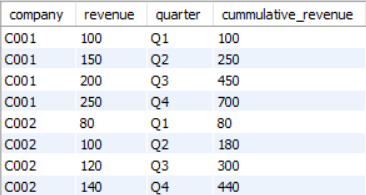